In [152]:
!pip install -q tensorflow_hub

You are using pip version 19.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [153]:
from __future__ import absolute_import, division, print_function

import matplotlib.pylab as plt

import tensorflow as tf
#import tensorflow_hub as hub

from tensorflow.keras import layers

tf.VERSION

'1.11.0'

In [154]:
import os
import glob
import cv2
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np

In [155]:
def get_im(path):
    # Load as grayscale
    img = cv2.imread(path, 0)
    # Reduce size
    #resized = cv2.resize(img, (128, 96))
    resized = cv2.resize(img, (500, 500))
    #print(type(resized))
    return resized

In [156]:
def load_data():
    X_train = []
    Y_train = []
    for cowId in range(3):
        path = os.path.join('..', 'data', 'images', str(cowId), '*')
        files = glob.glob(path)
        for fl in files:
            img = get_im(fl)
            X_train.append(img)
            Y_train.append(cowId)
    #print(X_train.shape)
    return np.array(X_train), Y_train

In [157]:
X_train, Y_train = load_data()
print(X_train.shape)
print(len(Y_train))

(233, 500, 500)
233


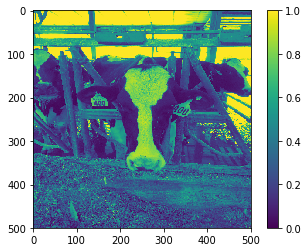

In [158]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [159]:
print(len(X_train))
print(len(Y_train))

233
233


In [160]:

train_images, test_images, train_labels, test_labels = train_test_split(X_train, Y_train, test_size=0.20, random_state=42)

#print(len(train_images))
#print(len(train_labels))


In [161]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [163]:
class_names = [0,1,2]

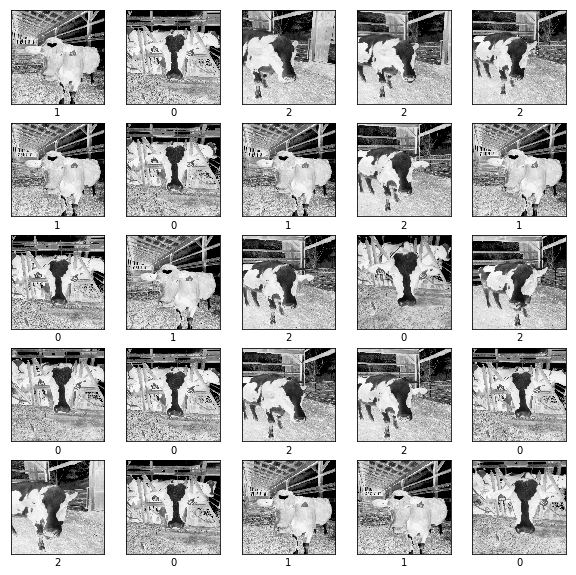

In [164]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [178]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(500, 500)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(3, activation=tf.nn.relu)
])

In [179]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs = 6)

Epoch 1/6
186/186 [==============================] - 107s 574ms/step - loss: 1.8242 - acc: 0.4462
Epoch 2/6
186/186 [==============================] - 94s 503ms/step - loss: 1.0986 - acc: 0.4516
Epoch 3/6
186/186 [==============================] - 157s 842ms/step - loss: 1.0986 - acc: 0.4516
Epoch 4/6
186/186 [==============================] - 266s 1s/step - loss: 1.0986 - acc: 0.4516
Epoch 5/6
 32/186 [====>.........................] - ETA: 3:01 - loss: 1.0986 - acc: 0.5000

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

In [ ]:
predictions = model.predict(test_images)

In [ ]:
model.save('basic_model.h5')

In [ ]:
saved_model = keras.models.load_model('basic_model.h5')